<a href="https://colab.research.google.com/github/Florenceflorence10/-My-answers.sql-/blob/main/Real_Time_Flower_Classification_with_TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow is preinstalled in Colab
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Only run this if tfds shows an error
!pip install tensorflow-datasets

# Import the dataset loader
import tensorflow_datasets as tfds


# Load dataset
(train_ds_raw, test_ds_raw), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

In [ ]:
IMG_SIZE = 180
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train_ds = train_ds_raw.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5)  # 5 flower classes (simulate recyclable types)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=5)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.2941 - loss: 1.9082 - val_accuracy: 0.5736 - val_loss: 1.0679
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 945ms/step - accuracy: 0.5695 - loss: 1.0391 - val_accuracy: 0.6240 - val_loss: 0.9752
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 890ms/step - accuracy: 0.7076 - loss: 0.7988 - val_accuracy: 0.6308 - val_loss: 0.9825
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 85s 925ms/step - accuracy: 0.8261 - loss: 0.5239 - val_accuracy: 0.5954 - val_loss: 1.2614
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 872ms/step - accuracy: 0.8649 - loss: 0.4037 - val_accuracy: 0.6131 - val_loss: 1.1505


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy*100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.6198 - loss: 1.1500
Test Accuracy: 61.31%


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite file
with open('recycle_model.tflite', 'wb') as f:
    f.write(tflite_model)

print(" Model converted to TFLite!")


Saved artifact at '/tmp/tmpqj2nj0sx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139688446025872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688446023376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688444850256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688444845840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688444847376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688444849488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688444851408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139688444850064: TensorSpec(shape=(), dtype=tf.resource, name=None)
 Model converted to TFLite!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


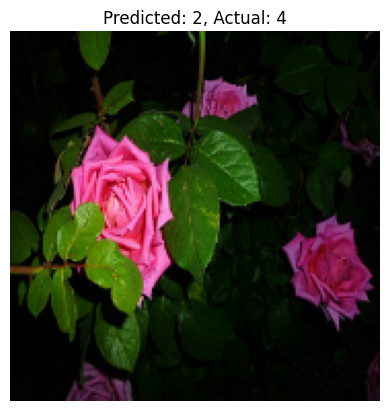

In [ ]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.imshow(images[0])
    plt.title(f"Predicted: {predicted_classes[0].numpy()}, Actual: {labels[0].numpy()}")
    plt.axis('off')
    plt.show()
